<a href="https://colab.research.google.com/github/Lorenzo1208/Brief_fao/blob/main/brief_fao_fonction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brief FAO

Graphique Pareto malnutrition, population, densité population


In [3]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

filecsv = ['https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_animal.csv',
           'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_cereal.csv',
           'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_population.csv',
           'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_sous_alimentation.csv',
           'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_vegetal.csv']
#print(f'list : {filecsv}')

conn = sqlite3.connect('bdd.sqlite')

'''
to_sql()
read_sql_query()
conn.execute("SELECT/INSERT/...")
'''

names = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole']

for i in filecsv:
    #print(i[79:-4])
    df_tabs = pd.read_csv(i, names = names, header = 0)
    #df_tabs.index = df_tabs['Code Pays']
    df_tabs.to_sql(i[79:-4], con=conn, if_exists='replace')
    #crée un fichier bdd.sqlite avec nos 5 tables
    #print(i[38:-4])
   


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [4]:
conn = sqlite3.connect('bdd.sqlite')

"""
df_population = pd.read_sql_query('''select Pays,"Code Pays",Valeur AS valeur_population
                           from population;''', con=conn)
#print(df_population)

df_cereal = pd.read_sql_query('''select "Code Pays",
                              Valeur AS valeur_cereal from cereal where Élément='Production' AND
                              Produit='Blé' ORDER BY "Code Pays";''', con=conn)
#print(df_cereal)
"""


df_graph = pd.read_sql_query('''SELECT cereal.Pays,
                             population."Code Pays",
                             population.Valeur AS valeur_population,
                             cereal.Valeur AS valeur_cereal,
                             
                             sous_alimentation."Code Pays",
                             sous_alimentation.Valeur AS valeur_sous_alimentation
                             
                             
                             FROM population
                             
                             INNER JOIN sous_alimentation
                             ON (population."Code Pays" = sous_alimentation."Code Pays")
                             
                             INNER JOIN cereal
                             ON (population."Code Pays" = cereal."Code Pays")
                             WHERE (cereal.Élément='Production'
                             AND cereal.Produit='Blé'
                             AND cereal.Valeur > 0
                             AND sous_alimentation.valeur > 0)
                             ORDER BY population."Code Pays";''', con=conn)

#df_graph

In [9]:
def my_graphs(df_graph):
  for z in ['valeur_sous_alimentation', 'valeur_population']:
    #sort DataFrame by count descending
    df_graph = df_graph.sort_values(by=z, ascending=False)

    #add column to display cumulative percentage
    df_graph['cumperc'] = df_graph[z].cumsum()/df_graph[z].sum()*100

    #define aesthetics for plot
    color1 = 'steelblue'
    color2 = 'red'
    line_size = 4

    #create basic bar plot
    fig, ax = plt.subplots()
    ax.bar(df_graph.Pays, df_graph[z], color=color1)

    #add cumulative percentage line to plot
    ax2 = ax.twinx()
    ax2.plot(df_graph.Pays, df_graph['cumperc'], color=color2, marker="D", ms=line_size)
    ax2.yaxis.set_major_formatter(PercentFormatter())

    #specify axis colors
    ax.tick_params(axis='y', colors=color1)
    ax2.tick_params(axis='y', colors=color2)

    #display Pareto chart
    plt.show()

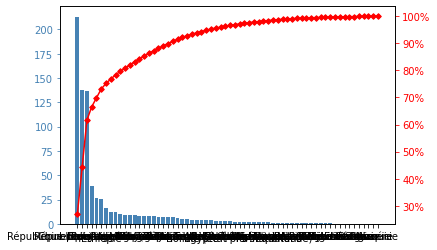

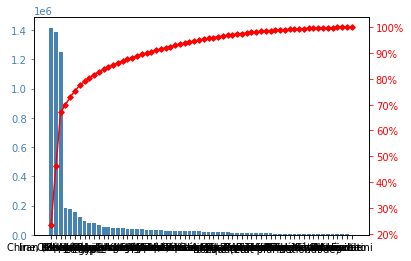

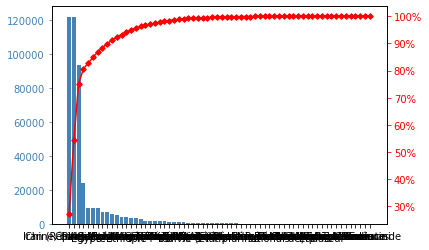

In [10]:

my_graphs(df_graph)


